<a href="https://colab.research.google.com/github/mahikkaaa/End_2_End_Data_Science_Project/blob/main/End2End_DatascienceProjectWithUdemy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### End to End Data Science Project
 Workflow
 + Data Prepration and EDA
 + KE
 + Recommendation System
 + ML Predictive Analysis
 + Productionized with Streamlit/Flask

##EDA

In [5]:
# Loading EDA Packages
import pandas as pd
import numpy as np

In [6]:
# Loading Data Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
# Hiding All Warnings
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Loading the Udemy Dataset
df = pd.read_csv("/content/udemy_courses.csv")

In [9]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


### Questions
+ Course Title
	- What is the most frequent words in course title
	- Longest/Shortest course title
	- How can we build recommendation systems via title using similarity
	- Most famous courses by number of subscribers

+ Subjects/Category
	- What is the distribution of subjects
	- How many courses per subject
	- Distribution of subjects per year
	- How many people purchase a particular subject
	- Which subject is the most popular

+ Published Year
	- Number of courses per year
	- Which year has the highest number of courses
	- What is the trend of courses per year

+ Levels
	- How many levels do we have
	- What is the distribution of courses per levels
	- Which subject have the highest levels
	- How many subscribers per levels
	- How many courses per levels

+ Duration of Course
	- Which courses have the highest duration (paid or not)
	- Which courses have higher duration
	- Duration vs number of subscribers

+ Subscribers
	- Which course have the highest number of subscribers
	- Average number of subscribers
	- Number of subscribers per Subject
	- Number of subscribers per year

+ Price
	- What is the average price of a course
	- What is the min/max price
	- How much does Udemy earn
	- The most profitable courses

+ Correlation Questions
	- Does number of subscribers depend on
	- number of reviews
	- price
	- number of lectures
	- content duration


## EDA on Subject/Category
+ Subjects/Category
  + What is the distribution of subjects
  + How many courses per subject
  + Distribution of subjects per year
  + How many people purchase a particular subject
  + Which subject is the most popular

In [10]:
df.columns


Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [11]:
# What subject/category are there in the dataset
df['subject'].unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

In [12]:
# How many subject/category are there in the dataset
len(df['subject'].unique())

4

In [13]:
# Distribution of Subject/Value Counts
df['subject'].value_counts()

Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64

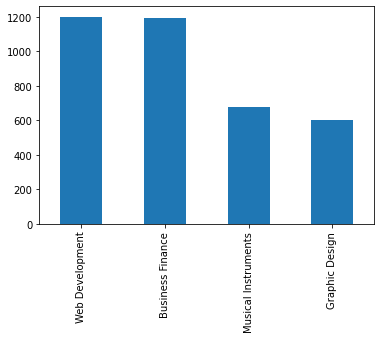

In [14]:
# Plot Distribution of Subject/Value Counts
df['subject'].value_counts().plot(kind='bar')

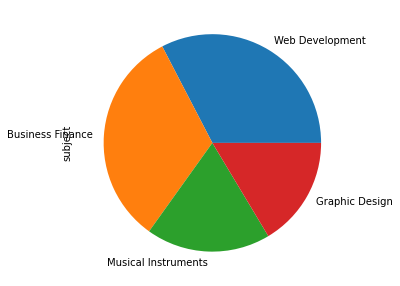

In [15]:
# Plot Distribution of Subject/Value Counts with Pie Chart
plt.figure(figsize=(10,5))
df['subject'].value_counts().plot(kind='pie')
plt.show()

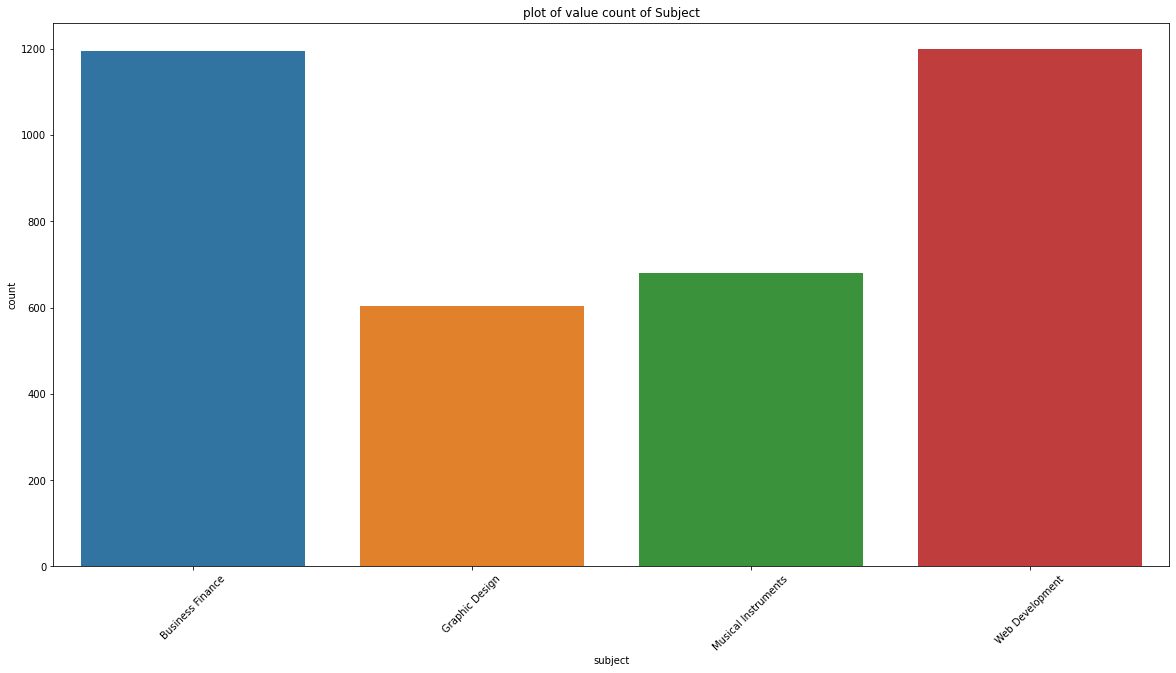

In [16]:
# Method 2 : using seaborn
plt.figure(figsize=(20,10))
sns.countplot(df['subject'])
plt.title("plot of value count of Subject")
plt.xticks(rotation=45)
plt.show()

### EDA on Subscribers
+ Subscribers
	- Which course have the highest number of subscribers
	- Average number of subscribers
	- Number of subscribers per Subject
	- Number of subscribers per year

In [17]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [18]:
# Number of Courses per Subject
df['subject'].value_counts()

Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64

In [19]:
# Number of subscribers per Subject
df.groupby('subject')['num_subscribers'].sum()

subject
Business Finance       1868711
Graphic Design         1063148
Musical Instruments     846689
Web Development        7980572
Name: num_subscribers, dtype: int64

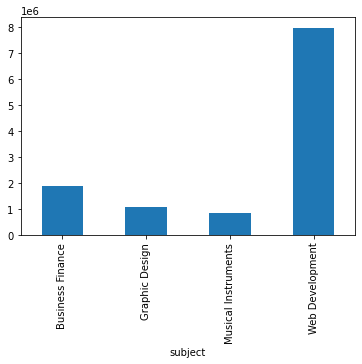

In [20]:
# plot of number of subscribers per subject in the form of bar chart
df.groupby('subject')['num_subscribers'].sum().plot(kind='bar')

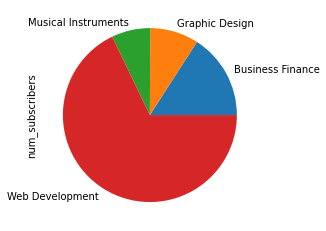

In [21]:
# plot of number of subscribers per subject in the form of pie chart
df.groupby('subject')['num_subscribers'].sum().plot(kind='pie')

###Narrative
+ More subscribers for Web development than Business Finance
+ The top subject category is Web Dev, Business Finance

In [22]:
#Total Number of Subscribers
df['num_subscribers'].sum()

11759120

In [23]:
#Average number of subscribers
df['num_subscribers'].mean()

3197.150625339859

In [24]:
#minimum number of subscribers
df['num_subscribers'].min()

0

In [25]:
#maximum number of subscribers
df['num_subscribers'].max()

268923

In [26]:
#Which course has the highest number of subscribers
df['num_subscribers'].idxmax()

2827

In [27]:
#Get the location
df.iloc[2827]

course_id                                                          41295
course_title                        Learn HTML5 Programming From Scratch
url                    https://www.udemy.com/learn-html5-programming-...
is_paid                                                            False
price                                                                  0
num_subscribers                                                   268923
num_reviews                                                         8629
num_lectures                                                          45
level                                                         All Levels
content_duration                                                    10.5
published_timestamp                                 2013-02-14T07:03:41Z
subject                                                  Web Development
Name: 2827, dtype: object

In [28]:
#Which course has the lowest number of subscribers
df['num_subscribers'].idxmin()

453

In [29]:
#Get the location
df.iloc[453]

course_id                                                         837322
course_title           Essentials of money value: Get a financial Life !
url                     https://www.udemy.com/essentials-of-money-value/
is_paid                                                             True
price                                                                 20
num_subscribers                                                        0
num_reviews                                                            0
num_lectures                                                          20
level                                                         All Levels
content_duration                                                0.616667
published_timestamp                                 2016-05-16T18:28:30Z
subject                                                 Business Finance
Name: 453, dtype: object

###Narrative
+ Udemy has over 11 million subscribers
+ Highest number of subscribers : 268923
+ Average number of subscribers : 3193

### EDA on Levels
+ Levels
	+ How many levels do we have
	+ What is the distribution of courses per levels
	+ Which subject have the highest levels
	+ How many subscribers per levels
	+ How many courses per levels

In [30]:
#How many levels do we have
df['level'].unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

In [31]:
#What is the distribution of courses per levels
df['level'].value_counts()

All Levels            1929
Beginner Level        1270
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

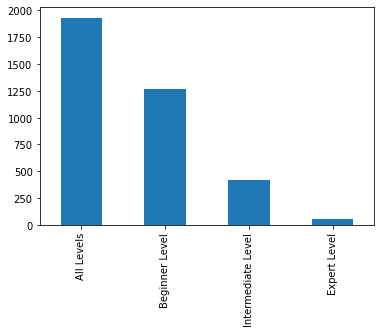

In [32]:
#What is the distribution of courses per levels
df['level'].value_counts().plot(kind='bar')

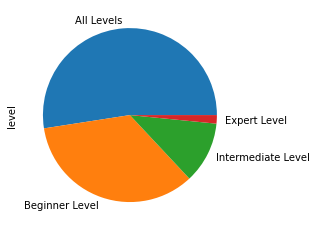

In [33]:
#What is the distribution of courses per levels
df['level'].value_counts().plot(kind='pie')

In [34]:
#How many subscribers per levels
df.groupby('level')['num_subscribers'].sum()

level
All Levels            6915076
Beginner Level        4051843
Expert Level            50196
Intermediate Level     742005
Name: num_subscribers, dtype: int64

In [35]:
df[['num_subscribers', 'level']]

,num_subscribers,level
0,2147,All Levels
1,2792,All Levels
2,2174,Intermediate Level
3,2451,All Levels
4,1276,Intermediate Level
...,...,...
3673,1040,All Levels
3674,306,Beginner Level
3675,513,All Levels
3676,300,All Levels


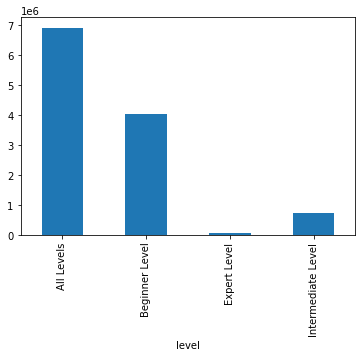

In [36]:
#Plot of how many subscribers per levels
df.groupby('level')['num_subscribers'].sum().plot(kind='bar')

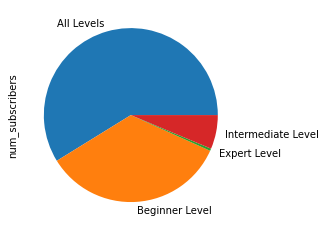

In [37]:
#Plot of how many subscribers per levels
df.groupby('level')['num_subscribers'].sum().plot(kind='pie')

In [38]:
#How many levels per subject category
df.groupby('subject')['level'].value_counts()

subject              level             
Business Finance     All Levels            696
                     Beginner Level        340
                     Intermediate Level    128
                     Expert Level           31
Graphic Design       All Levels            298
                     Beginner Level        243
                     Intermediate Level     57
                     Expert Level            5
Musical Instruments  Beginner Level        296
                     All Levels            276
                     Intermediate Level    101
                     Expert Level            7
Web Development      All Levels            659
                     Beginner Level        391
                     Intermediate Level    135
                     Expert Level           15
Name: level, dtype: int64

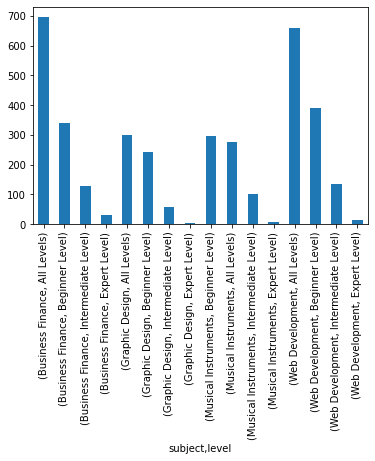

In [39]:
# Plot of how many levels per subject category
df.groupby('subject')['level'].value_counts().plot(kind='bar')

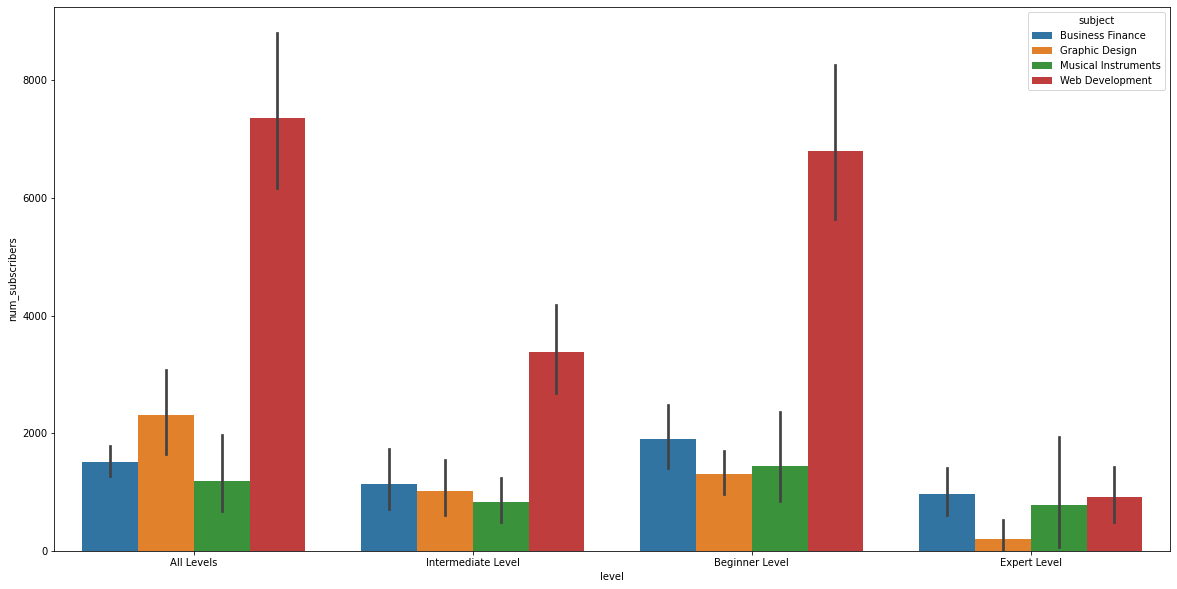

In [40]:
#using seaborn
plt.figure(figsize=(20, 10))
sns.barplot(x='level', y='num_subscribers', hue='subject', data=df)
plt.show()

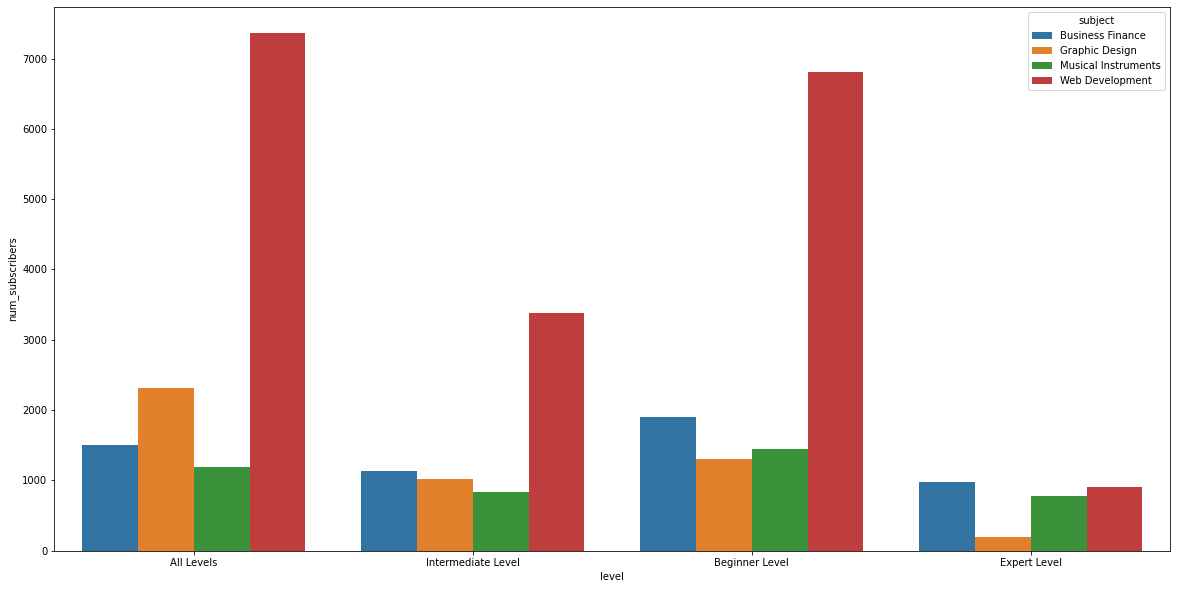

In [41]:
#using seaborn
plt.figure(figsize=(20, 10))
sns.barplot(x='level', y='num_subscribers', hue='subject', data=df, ci= None)
plt.show()

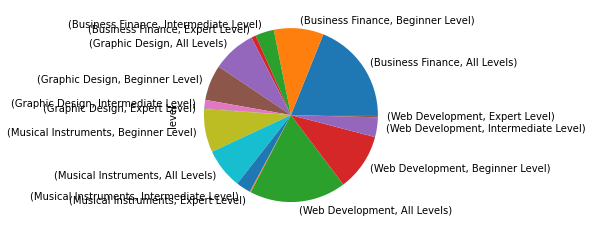

In [42]:
# Plot of how many levels per subject category
df.groupby('subject')['level'].value_counts().plot(kind='pie')

In [43]:
#EDA on lectures
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [44]:
def plot_num_of_countable_feature(feature): 
  #using seaborn
  plt.figure(figsize=(10, 7))
  plt.title("Plot of {} per level per subject".format(feature))
  sns.barplot(x='level', y=feature, hue='subject', data=df, ci= None)
  plt.show()
  plt.figure(figsize=(10, 7))
  #how many subscribers per levels
  plt.title("plot of {} per level".format(feature))
  df.groupby('level')[feature].sum().plot(kind='pie')
  plt.show()

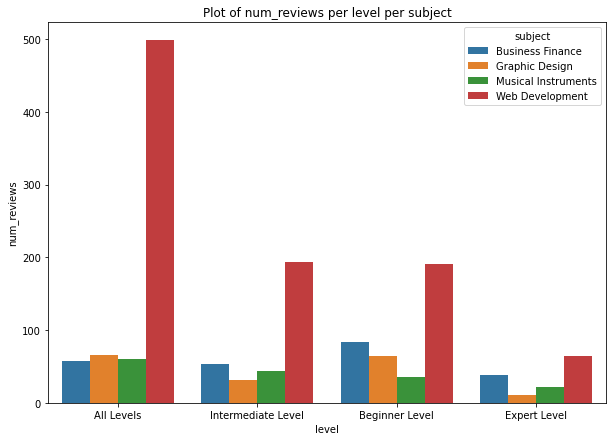

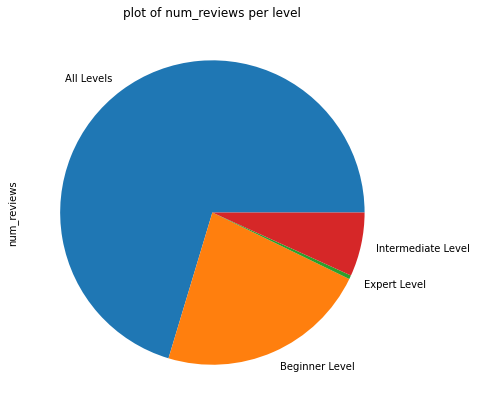

In [45]:
#plot for the lectures* reviews
plot_num_of_countable_feature('num_reviews')

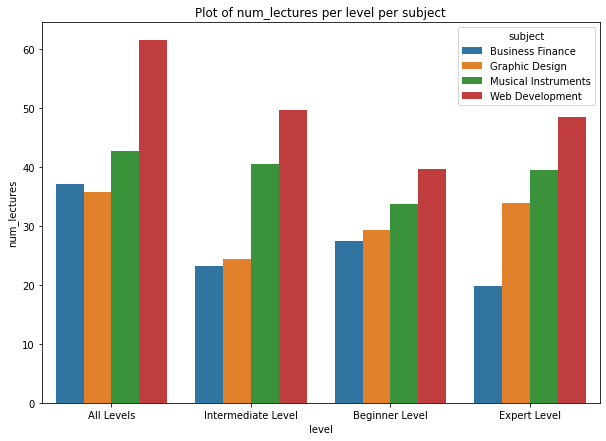

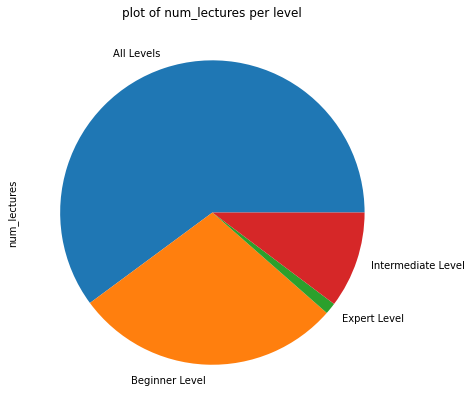

In [46]:
# plot of lectures
plot_num_of_countable_feature('num_lectures')

### EDA on Prices
+ Prices
	- What is the average price of a course
	- What is the min/max price
	- How much does Udemy earn
	- The most profitable courses

In [47]:
df['price'] = df['price'].astype(float)

In [48]:
#What is the average price
df['price'].mean()

66.0494834148994

In [49]:
#Unique price
df['price'].unique()

array([200.,  75.,  45.,  95., 150.,  65., 195.,  30.,  20.,  50., 175.,
       140., 115., 190., 125.,  60., 145., 105., 155., 185., 180., 120.,
        25., 160.,  40.,   0., 100.,  90.,  35.,  80.,  70.,  55., 165.,
       130.,  85., 170., 110., 135.])

In [50]:
# What is the max price
df['price'].max()

200.0

In [51]:
# What is the max price location
df['price'].idxmax()

0

In [52]:
df.iloc[0]

course_id                                                        1070968
course_title                          Ultimate Investment Banking Course
url                    https://www.udemy.com/ultimate-investment-bank...
is_paid                                                             True
price                                                              200.0
num_subscribers                                                     2147
num_reviews                                                           23
num_lectures                                                          51
level                                                         All Levels
content_duration                                                     1.5
published_timestamp                                 2017-01-18T20:58:58Z
subject                                                 Business Finance
Name: 0, dtype: object

In [53]:
# What is the most profitable course
# price x num_subscriber
df['profit'] = df['price'] * df['num_subscribers']

In [54]:
# What is the most profitable
df['profit'].max()

24316800.0

###Narrative
+ Most profitable course made 24 million $

In [55]:
# The location of course
df['profit'].idxmax()

3230

In [56]:
df.iloc[3230]


course_id                                                         625204
course_title                                  The Web Developer Bootcamp
url                    https://www.udemy.com/the-web-developer-bootcamp/
is_paid                                                             True
price                                                              200.0
num_subscribers                                                   121584
num_reviews                                                        27445
num_lectures                                                         342
level                                                         All Levels
content_duration                                                    43.0
published_timestamp                                 2015-11-02T21:13:27Z
subject                                                  Web Development
profit                                                        24316800.0
Name: 3230, dtype: object

In [57]:
# How Many Courses on Udemy Are paid or free
df['is_paid'].unique()

array([ True, False])

In [58]:
paid_dict = {'True':True,'False':False,'FALSE':False,'TRUE':True,'https://www.udemy.com/learnguitartoworship/':True}

In [59]:
df['is_paid'] = df['is_paid'].map(paid_dict)

In [60]:
#How Many Courses on Udemy Are paid or free
df['is_paid'].value_counts()

Series([], Name: is_paid, dtype: int64)

In [61]:
# How many paid/free course in each subject category
df.groupby('is_paid')['subject'].value_counts()

Series([], Name: subject, dtype: int64)

### Correlation Question
+ Correlation Questions
	- Does number of subscribers depend on
	- number of reviews
	- price
	- number of lectures
	- content duration

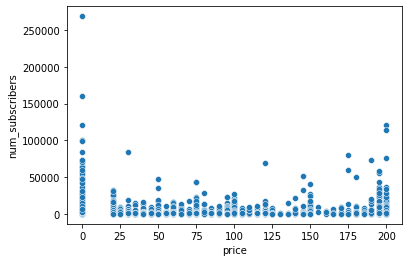

In [62]:
sns.scatterplot(data=df,x='price',y='num_subscribers')


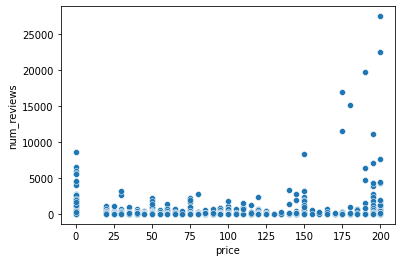

In [63]:
sns.scatterplot(data=df,x='price',y='num_reviews')


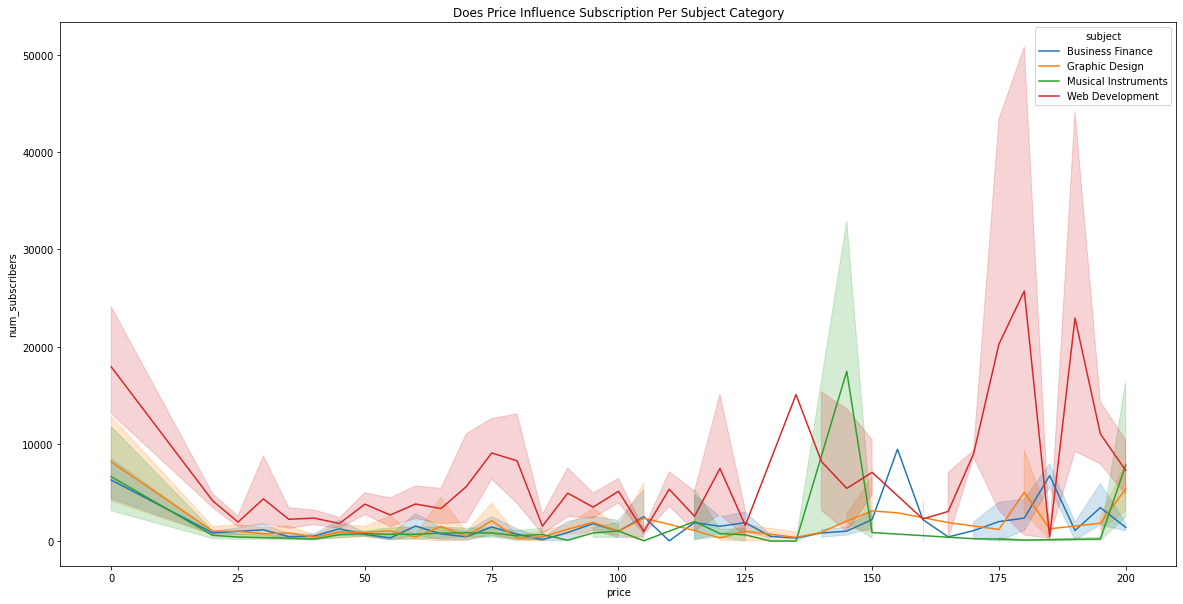

In [64]:
plt.figure(figsize=(20,10))
plt.title("Does Price Influence Subscription Per Subject Category")
sns.lineplot(data=df,x='price',y='num_subscribers',hue='subject')
plt.show()

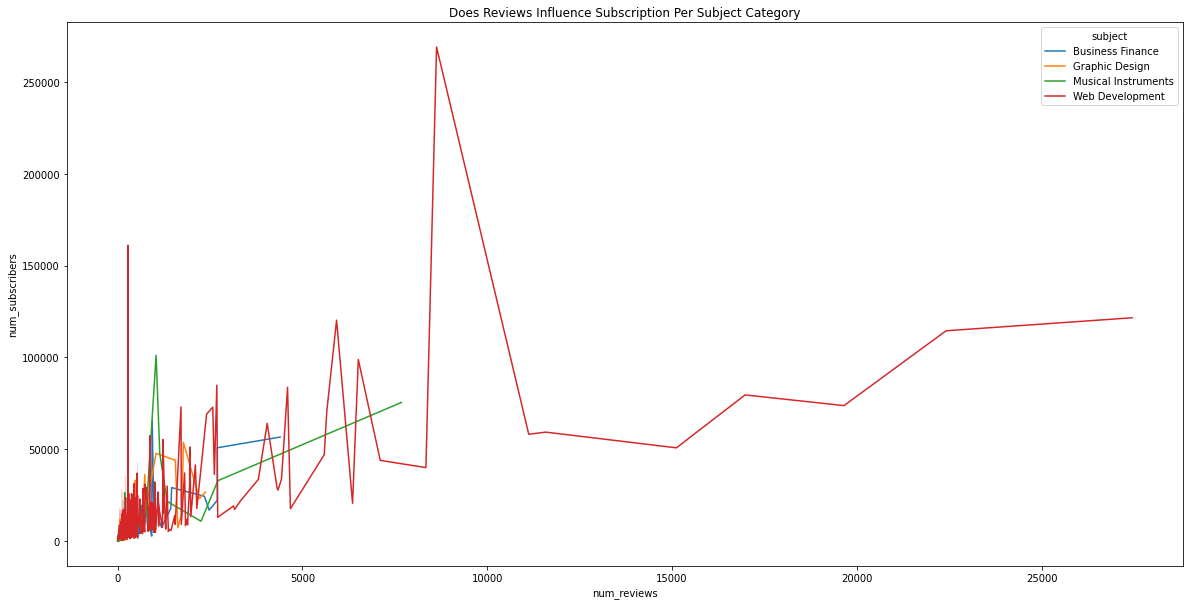

In [65]:
plt.figure(figsize=(20,10))
plt.title("Does Reviews Influence Subscription Per Subject Category")
sns.lineplot(data=df,x='num_reviews',y='num_subscribers',hue='subject')
plt.show()

###Question on Time
+ Published Year
  + Number of courses per year
  + Distribution of subjects per year
  + Which year has the highest number of courses
  + What is the trend of courses per year



In [66]:
df.head()


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,NaN,200.0,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,429400.0
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,NaN,75.0,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,209400.0
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,NaN,45.0,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,97830.0
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,NaN,95.0,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance,232845.0
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,NaN,200.0,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance,255200.0


In [67]:
df['published_timestamp'].dtype


dtype('O')

In [68]:
df['published_timestamp'].head()

0    2017-01-18T20:58:58Z
1    2017-03-09T16:34:20Z
2    2016-12-19T19:26:30Z
3    2017-05-30T20:07:24Z
4    2016-12-13T14:57:18Z
Name: published_timestamp, dtype: object

In [69]:
df['published_timestamp'].str.split('T')

0       [2017-01-18, 20:58:58Z]
1       [2017-03-09, 16:34:20Z]
2       [2016-12-19, 19:26:30Z]
3       [2017-05-30, 20:07:24Z]
4       [2016-12-13, 14:57:18Z]
                 ...           
3673    [2016-06-14, 17:36:46Z]
3674    [2017-03-10, 22:24:30Z]
3675    [2015-12-30, 16:41:42Z]
3676    [2016-08-11, 19:06:15Z]
3677    [2014-09-28, 19:51:11Z]
Name: published_timestamp, Length: 3678, dtype: object

In [70]:
df['published_date'] = df['published_timestamp'].str.split('T').str.get(0)

In [71]:
df['published_date']

0       2017-01-18
1       2017-03-09
2       2016-12-19
3       2017-05-30
4       2016-12-13
           ...    
3673    2016-06-14
3674    2017-03-10
3675    2015-12-30
3676    2016-08-11
3677    2014-09-28
Name: published_date, Length: 3678, dtype: object

In [72]:
from datetime import datetime
def convert_to_dt(x):
    mydate = datetime.strptime(x,'%Y-%m-%d')
    result = mydate.strftime("%Y-%m-%d")
    return result

In [73]:
df['published_date'] = df['published_date'].str.replace('3 hours','2017-01-18')

In [74]:
convert_to_dt("2017-01-18")

'2017-01-18'

In [75]:
df['published_date'].apply(lambda x: convert_to_dt(x))

0       2017-01-18
1       2017-03-09
2       2016-12-19
3       2017-05-30
4       2016-12-13
           ...    
3673    2016-06-14
3674    2017-03-10
3675    2015-12-30
3676    2016-08-11
3677    2014-09-28
Name: published_date, Length: 3678, dtype: object

In [76]:
df.dtypes


course_id                int64
course_title            object
url                     object
is_paid                 object
price                  float64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration       float64
published_timestamp     object
subject                 object
profit                 float64
published_date          object
dtype: object

In [77]:
df['published_date'] = pd.to_datetime(df['published_date'],format="%Y-%m-%d")


In [78]:
df.dtypes

course_id                       int64
course_title                   object
url                            object
is_paid                        object
price                         float64
num_subscribers                 int64
num_reviews                     int64
num_lectures                    int64
level                          object
content_duration              float64
published_timestamp            object
subject                        object
profit                        float64
published_date         datetime64[ns]
dtype: object

In [79]:
df['year'] = df['published_date'].dt.year
df['month'] = df['published_date'].dt.month
df['day'] = df['published_date'].dt.day

In [80]:
df.groupby('year')['num_subscribers'].value_counts()

year  num_subscribers
2011  3697               1
      7014               1
      12458              1
      26673              1
      69186              1
                        ..
2017  15276              1
      16158              1
      16829              1
      17784              1
      26742              1
Name: num_subscribers, Length: 2893, dtype: int64

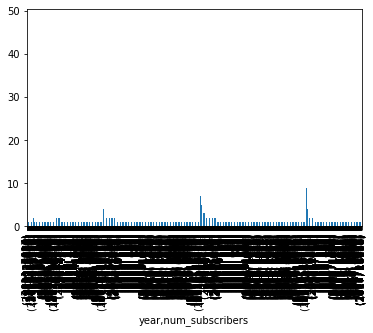

In [81]:
# Plot of Sub Per Year
df.groupby('year')['num_subscribers'].value_counts().plot(kind='bar')

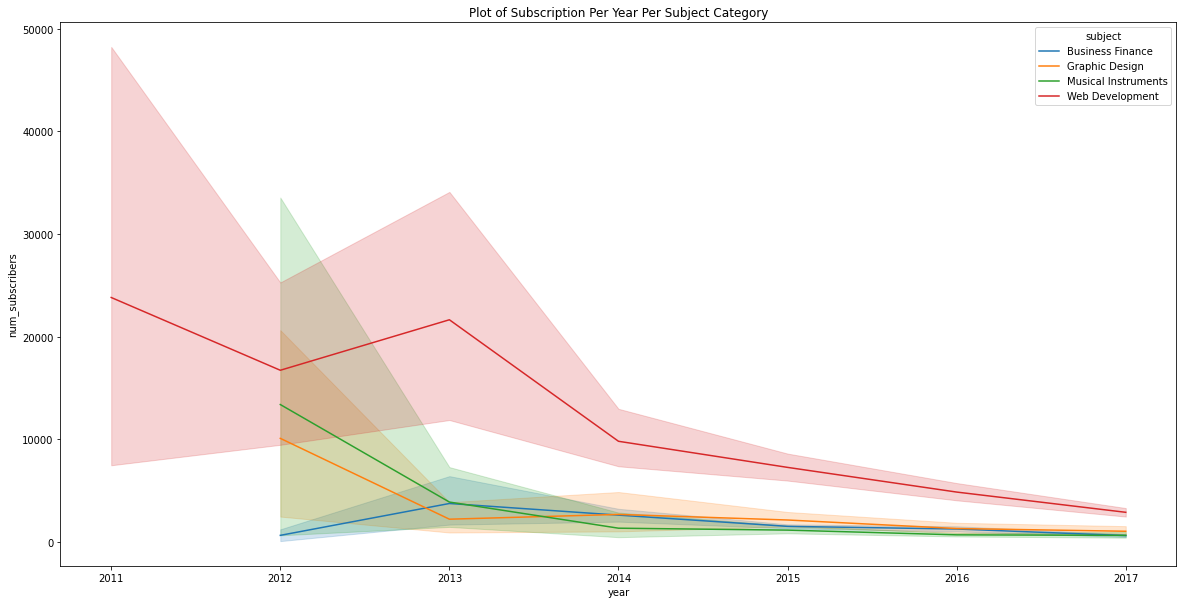

In [82]:
plt.figure(figsize=(20,10))
plt.title("Plot of Subscription Per Year Per Subject Category")
sns.lineplot(data=df,x='year',y='num_subscribers',hue='subject')
plt.show()

### Questions on Course Title
+ Course Title
  + What is the most frequent words in course title
  + Longest/Shortest course title
  + How can we build recommendation systems via title using similarity
  + Most famous courses by number of subscribers

In [83]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,year,month,day
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,NaN,200.0,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,429400.0,2017-01-18,2017,1,18
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,NaN,75.0,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,209400.0,2017-03-09,2017,3,9
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,NaN,45.0,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,97830.0,2016-12-19,2016,12,19
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,NaN,95.0,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance,232845.0,2017-05-30,2017,5,30
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,NaN,200.0,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance,255200.0,2016-12-13,2016,12,13


In [84]:
# Get the Longest Title for a course
df['course_title'].str.len()

0       34
1       59
2       56
3       50
4       44
        ..
3673    56
3674    55
3675    29
3676    54
3677    52
Name: course_title, Length: 3678, dtype: int64

In [85]:
# Get the Longest Title for a course
df['course_title_len'] = df['course_title'].str.len()

In [86]:
# Get Longest title
df['course_title_len'].max()

243

In [87]:
# Get tlocation
df.iloc[243]

course_id                                                         337320
course_title           Cash Flow Valuation: Develop Your Financial Li...
url                     https://www.udemy.com/financial-literacy-basics/
is_paid                                                              NaN
price                                                              105.0
num_subscribers                                                     2987
num_reviews                                                           23
num_lectures                                                          19
level                                                         All Levels
content_duration                                                     2.0
published_timestamp                                 2014-12-22T13:39:16Z
subject                                                 Business Finance
profit                                                          313635.0
published_date                                     

Keyword Extraction
+ Rake
+ Yakes
+ Collection

In [88]:
df['course_title']

0                      Ultimate Investment Banking Course
1       Complete GST Course & Certification - Grow You...
2       Financial Modeling for Business Analysts and C...
3       Beginner to Pro - Financial Analysis in Excel ...
4            How To Maximize Your Profits Trading Options
                              ...                        
3673    Learn jQuery from Scratch - Master of JavaScri...
3674    How To Design A WordPress Website With No Codi...
3675                        Learn and Build using Polymer
3676    CSS Animations: Create Amazing Effects on Your...
3677    Using MODX CMS to Build Websites: A Beginner's...
Name: course_title, Length: 3678, dtype: object

In [89]:
# Text Cleaning to remove stopwords
!pip install neattext
import neattext.functions as nfx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 KB 12.0 MB/s eta 0:00:00


In [90]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [91]:
df['clean_title'] = df['course_title'].apply(nfx.remove_stopwords)


In [92]:
df[['clean_title','course_title']]

,clean_title,course_title
0,Ultimate Investment Banking Course,Ultimate Investment Banking Course
1,Complete GST Course & Certification - Grow Pra...,Complete GST Course & Certification - Grow You...
2,Financial Modeling Business Analysts Consultants,Financial Modeling for Business Analysts and C...
3,Beginner Pro - Financial Analysis Excel 2017,Beginner to Pro - Financial Analysis in Excel ...
4,Maximize Profits Trading Options,How To Maximize Your Profits Trading Options
...,...,...
3673,Learn jQuery Scratch - Master JavaScript library,Learn jQuery from Scratch - Master of JavaScri...
3674,Design WordPress Website Coding,How To Design A WordPress Website With No Codi...
3675,Learn Build Polymer,Learn and Build using Polymer
3676,CSS Animations: Create Amazing Effects Website,CSS Animations: Create Amazing Effects on Your...


In [93]:
df['clean_title'] = df['clean_title'].apply(nfx.remove_special_characters)

In [94]:
df['clean_title']

0                      Ultimate Investment Banking Course
1       Complete GST Course  Certification  Grow Practice
2        Financial Modeling Business Analysts Consultants
3             Beginner Pro  Financial Analysis Excel 2017
4                        Maximize Profits Trading Options
                              ...                        
3673      Learn jQuery Scratch  Master JavaScript library
3674                      Design WordPress Website Coding
3675                                  Learn Build Polymer
3676        CSS Animations Create Amazing Effects Website
3677              MODX CMS Build Websites Beginners Guide
Name: clean_title, Length: 3678, dtype: object

In [95]:
# Tokenization
all_title_list = df['clean_title'].to_list()

In [96]:
all_title_list[1:100]

['Complete GST Course  Certification  Grow Practice',
 'Financial Modeling Business Analysts Consultants',
 'Beginner Pro  Financial Analysis Excel 2017',
 'Maximize Profits Trading Options',
 'Trading Penny Stocks Guide Levels 2017',
 'Investing Trading Beginners Mastering Price Charts',
 'Trading Stock Chart Patterns Immediate Explosive Gains',
 'Options Trading 3  Advanced Stock Profit Success Method',
 'Investment Strategy Need Retirement',
 'Forex Trading Secrets Pros Amazons AWS',
 'Trading Options Money Flow',
 'Financial Management Risk Return Securities',
 'Forex Trading Course Work Smarter Harder Proven Results',
 'Python Algo Trading Sentiment Trading News',
 'Short Selling Learn Sell Stocks Fall',
 'Basic Technical Analysis Learn structure market',
 'Complete Chart Pattern Trading Course Proven Approach',
 '7 Deadly Mistakes Investing Slash Profits',
 'Financial Statements Easy',
 'Winning Forex Trading Live Forex Trading Examples',
 'Forex Traders  Create Trading Robot Cod

In [97]:
for line in all_title_list[1:5]:
    print(line.split())
    for i in line.split():
        print(i)

['Complete', 'GST', 'Course', 'Certification', 'Grow', 'Practice']
Complete
GST
Course
Certification
Grow
Practice
['Financial', 'Modeling', 'Business', 'Analysts', 'Consultants']
Financial
Modeling
Business
Analysts
Consultants
['Beginner', 'Pro', 'Financial', 'Analysis', 'Excel', '2017']
Beginner
Pro
Financial
Analysis
Excel
2017
['Maximize', 'Profits', 'Trading', 'Options']
Maximize
Profits
Trading
Options


In [98]:
# Convert list to tokens
all_tokens = [i for line in all_title_list for i in line.split()]

In [99]:
all_tokens

['Ultimate',
 'Investment',
 'Banking',
 'Course',
 'Complete',
 'GST',
 'Course',
 'Certification',
 'Grow',
 'Practice',
 'Financial',
 'Modeling',
 'Business',
 'Analysts',
 'Consultants',
 'Beginner',
 'Pro',
 'Financial',
 'Analysis',
 'Excel',
 '2017',
 'Maximize',
 'Profits',
 'Trading',
 'Options',
 'Trading',
 'Penny',
 'Stocks',
 'Guide',
 'Levels',
 '2017',
 'Investing',
 'Trading',
 'Beginners',
 'Mastering',
 'Price',
 'Charts',
 'Trading',
 'Stock',
 'Chart',
 'Patterns',
 'Immediate',
 'Explosive',
 'Gains',
 'Options',
 'Trading',
 '3',
 'Advanced',
 'Stock',
 'Profit',
 'Success',
 'Method',
 'Investment',
 'Strategy',
 'Need',
 'Retirement',
 'Forex',
 'Trading',
 'Secrets',
 'Pros',
 'Amazons',
 'AWS',
 'Trading',
 'Options',
 'Money',
 'Flow',
 'Financial',
 'Management',
 'Risk',
 'Return',
 'Securities',
 'Forex',
 'Trading',
 'Course',
 'Work',
 'Smarter',
 'Harder',
 'Proven',
 'Results',
 'Python',
 'Algo',
 'Trading',
 'Sentiment',
 'Trading',
 'News',
 'Short

In [100]:
from collections import Counter

In [101]:
word_freq = Counter(all_tokens)

In [102]:
# Top Words
dict(word_freq.most_common(30))

{'Learn': 491,
 'Trading': 280,
 'Beginners': 246,
 'Course': 231,
 'Guitar': 208,
 'Web': 205,
 'Design': 187,
 'Complete': 181,
 'Piano': 177,
 'Photoshop': 166,
 'Forex': 163,
 'Build': 161,
 'Financial': 138,
 'Create': 135,
 'JavaScript': 123,
 'Beginner': 120,
 'Guide': 116,
 'HTML': 116,
 'Accounting': 111,
 'Website': 110,
 'Development': 110,
 '2': 106,
 'PHP': 105,
 'Options': 101,
 'Adobe': 100,
 'Play': 98,
 '1': 97,
 'de': 97,
 'Introduction': 93,
 'CSS': 92}

In [103]:
top_words = dict(word_freq.most_common(50))

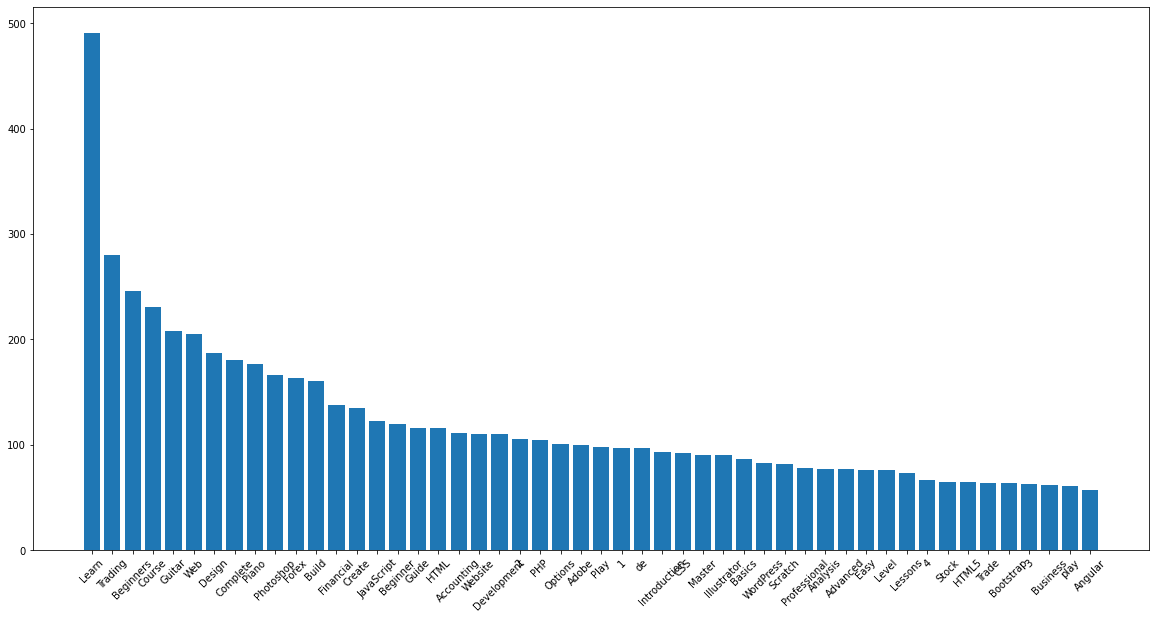

In [104]:
plt.figure(figsize=(20,10))
plt.bar(*zip(*top_words.items()))
plt.xticks(rotation=45)
plt.show()

In [105]:
!pip install rake_nltk


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [107]:
from rake_nltk import Rake

In [109]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [110]:
r = Rake()

In [111]:
join_words = ' '.join(all_tokens)

In [114]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [115]:
r.extract_keywords_from_text(join_words)

In [116]:
print(r.get_ranked_phrases_with_scores())

[(1931668.6688249605, 'angular 2 angular 4 complete aspnet mvc 5 course graphql react complete developers guide create simple photo gallery dropzonejs slick php wordpress hour createmanage website twitter bootstrap 2 beginners bootstrap tutorial essentials basic advanced create engaging website twitter bootstrap 2x javascript basics beginners css tutorial beginners style wordpress templates html5 css3 build modern responsive websites psd html5css3 twitter bootstrap 3 web development website sell thousands wordpress basics business share sell expertise php zend framework 2creating crud application javascript fundamentals building website jekyll big data apache hadoop developers fundamentals wordpress development create custom wordpress website wordpress website 2017 restful services aspnet web api web hosting fundamentals learning path react stunning react websites administering microsoft sql server 2012 databases 70462 php codeignitercrud concepts mvc adobe experience manager cms basic